# üìä Aula de Distribui√ß√£o de Frequ√™ncia com Python

## üìå O que √© uma Distribui√ß√£o de Frequ√™ncia?
A distribui√ß√£o de frequ√™ncia √© uma forma de organizar dados, mostrando quantas vezes cada valor ocorre em um conjunto de dados. Ela pode ser representada de duas formas principais:

1. **Frequ√™ncia Simples:** Conta a ocorr√™ncia de cada valor √∫nico.
2. **Frequ√™ncia com Classes:** Agrupa os valores em intervalos (bins).

No **Python**, podemos criar tabelas de distribui√ß√£o de frequ√™ncia utilizando a biblioteca **pandas**.


## Importando os dados

In [10]:
# Importando a biblioteca pandas
import pandas as pd

In [42]:
# Importando o arquivo csv com os dados do question√°rio
df = pd.read_csv('https://raw.githubusercontent.com/luiscarlosjunior/aulas-graduacao/refs/heads/master/data-science/analise-dados/datasets/csv/questionario.csv', sep=';')
# head da uma vis√£o das primeiras 5 linhas
df.head()

idade  altura  tempo_chegar_faculdade data_aniversario  numero_aleatorio
0     41    1.80                      90       25/09/1982                17
1     41    1.81                      40       22/10/1983                 7
2     38    1.79                      50       15/06/1986                40
3     36    1.62                      60       29/05/1988                10
4     31    1.65                      35       28/08/1993               444

In [7]:
# Apresenta as colunas que h√° no
df.columns

Index(['idade', 'altura', 'tempo_chegar_faculdade', 'data_aniversario',
       'numero_aleatorio'],
      dtype='object')

In [ ]:
# Gera estat√≠stica descritiva com as informa√ß√µes b√°sicas
df['idade'].describe()

## üìä Criando uma Tabela de Frequ√™ncia Simples
Se quisermos contar quantas vezes cada valor aparece em uma coluna espec√≠fica, podemos usar:

In [8]:
# Criando tabela de frequ√™ncia simples
tabela_freq = df['idade'].value_counts().sort_index()

# Exibir a tabela
print(tabela_freq)

idade
17     1
18    11
19    12
20     8
21    12
22     4
23     7
24     3
25     2
26     1
27     2
28     2
31     2
36     1
38     1
41     2
Name: count, dtype: int64


## üìä Criando uma Tabela de Frequ√™ncia com Classes (Intervalos)
Se os dados forem muito dispersos, podemos agrup√°-los em intervalos (bins):

In [14]:
import numpy as np
import pandas as pd

# Supondo que o DataFrame j√° est√° carregado
coluna = 'idade'  # Nome da coluna que queremos analisar

# Definir automaticamente os intervalos usando numpy
num_classes = 5  # N√∫mero de classes (ajuste conforme necess√°rio)
bins = np.histogram_bin_edges(df[coluna], bins=num_classes)

# Criar r√≥tulos automaticamente
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]

# Criar a tabela de frequ√™ncia agrupada
tabela_freq_classes = pd.cut(df[coluna], bins=bins, labels=labels, right=False).value_counts().sort_index()

# Exibir a tabela
print(tabela_freq_classes)

idade
17-21    44
21-26    17
26-31     6
31-36     1
36-41     1
Name: count, dtype: int64


## üìà Criando um Gr√°fico de Frequ√™ncia
Para visualizar melhor a distribui√ß√£o, podemos criar um gr√°fico de barras:

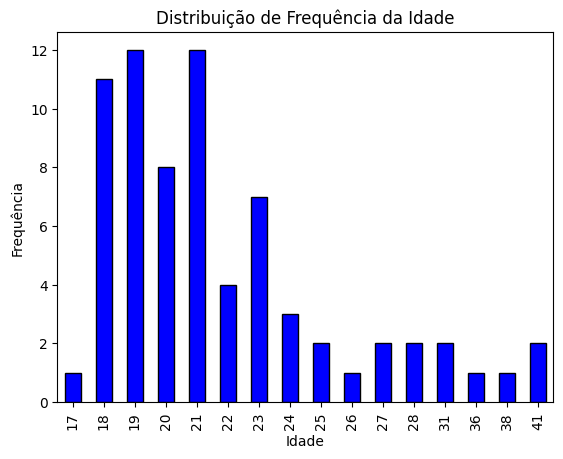

In [13]:
import matplotlib.pyplot as plt

# Criar gr√°fico de barras
tabela_freq.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')
plt.title('Distribui√ß√£o de Frequ√™ncia da Idade')
plt.show()


# üìà Analisando datas

## üìå Introdu√ß√£o
Datas s√£o comuns em datasets e podem ser analisadas para identificar padr√µes temporais. O **pandas** oferece suporte poderoso para manipula√ß√£o de datas.


## üìÇ 1. Carregar e Converter Datas no Pandas
Quando um dataset cont√©m colunas de **datas**, precisamos convert√™-las para o formato correto.


In [15]:
# Importando a biblioteca pandas
import pandas as pd

In [16]:
# Importando o arquivo csv com os dados do question√°rio
df = pd.read_csv('https://raw.githubusercontent.com/luiscarlosjunior/aulas-graduacao/refs/heads/master/data-science/analise-dados/datasets/csv/questionario.csv', sep=';')
# head da uma vis√£o das primeiras 5 linhas
df.head()

idade  altura  tempo_chegar_faculdade data_aniversario  numero_aleatorio
0     41    1.80                      90       25/09/1982                17
1     41    1.81                      40       22/10/1983                 7
2     38    1.79                      50       15/06/1986                40
3     36    1.62                      60       29/05/1988                10
4     31    1.65                      35       28/08/1993               444

In [17]:
# Apresenta as colunas que h√° no
df.columns

Index(['idade', 'altura', 'tempo_chegar_faculdade', 'data_aniversario',
       'numero_aleatorio'],
      dtype='object')

In [27]:
# Converter a coluna de datas (substitua 'data' pelo nome correto da coluna)
try:
  df['data'] = pd.to_datetime(df['data_aniversario'])
  # Verificar o tipo da coluna
except:
  print('A coluna n√£o existe')
df['data'].dtypes

<ipython-input-27-96e966402afd>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data'] = pd.to_datetime(df['data_aniversario'])


dtype('<M8[ns]')

## üìÜ 2. Extraindo Informa√ß√µes de Datas
Podemos decompor datas em ano, m√™s, dia, dia da semana, etc.

In [29]:
# Criando novas colunas com ano, m√™s e dia
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia'] = df['data'].dt.day
df['dia_semana'] = df['data'].dt.dayofweek
df['mes_nome'] = df['data'].dt.month_name()
df['dia_da_semana'] = df['data'].dt.day_name()

# Exibir algumas linhas
df.head()


idade  altura  tempo_chegar_faculdade data_aniversario  numero_aleatorio  \
0     41    1.80                      90       25/09/1982                17   
1     41    1.81                      40       22/10/1983                 7   
2     38    1.79                      50       15/06/1986                40   
3     36    1.62                      60       29/05/1988                10   
4     31    1.65                      35       28/08/1993               444   

        data   ano  mes  dia dia_da_semana  dia_semana   mes_nome  
0 1982-09-25  1982    9   25      Saturday           5  September  
1 1983-10-22  1983   10   22      Saturday           5    October  
2 1986-06-15  1986    6   15        Sunday           6       June  
3 1988-05-29  1988    5   29        Sunday           6        May  
4 1993-08-28  1993    8   28      Saturday           5     August

## üìà 3. Filtrando Dados por Per√≠odos
Podemos filtrar registros por intervalos de datas.

Exemplo: Selecionar registros de 2025

In [30]:
df_2023 = df[df['data'].dt.year == 2025]
df_2023.head()


idade  altura  tempo_chegar_faculdade data_aniversario  numero_aleatorio  \
66     23    1.75                      70       16/01/2025                 8   
67     19    1.73                      40       22/02/2025                14   
68     24    1.60                      40       20/03/2025                12   
69     28    1.75                      60       07/05/2025                 7   
70     19    1.77                      45       07/12/2025                23   

         data   ano  mes  dia dia_da_semana  dia_semana  mes_nome  
66 2025-01-16  2025    1   16      Thursday           3   January  
67 2025-02-22  2025    2   22      Saturday           5  February  
68 2025-03-20  2025    3   20      Thursday           3     March  
69 2025-05-07  2025    5    7     Wednesday           2       May  
70 2025-12-07  2025   12    7        Sunday           6  December

In [32]:
# Exemplo: Selecionar registros entre janeiro e mar√ßo de 2022
df_periodo = df[(df['data'] >= '2000-01-01') & (df['data'] <= '2005-03-31')]
df_periodo.head()

idade  altura  tempo_chegar_faculdade data_aniversario  numero_aleatorio  \
12     24    1.71                      40       09/03/2000                11   
13     24    1.80                      70       22/04/2000                22   
14     23    1.70                      40       19/07/2001                 7   
15     23    1.72                      50       09/08/2001                10   
16     23    1.65                      40       10/10/2001                 8   

         data   ano  mes  dia dia_da_semana  dia_semana mes_nome  
12 2000-03-09  2000    3    9      Thursday           3    March  
13 2000-04-22  2000    4   22      Saturday           5    April  
14 2001-07-19  2001    7   19      Thursday           3     July  
15 2001-08-09  2001    8    9      Thursday           3   August  
16 2001-10-10  2001   10   10     Wednesday           2  October

## ‚è≥ 4. C√°lculos com Datas
Podemos calcular diferen√ßas entre datas para medir tempo decorrido.

In [33]:
# Criar uma nova coluna com a diferen√ßa entre datas
df['dias_desde_inicio'] = (df['data'] - df['data'].min()).dt.days

df.head()


idade  altura  tempo_chegar_faculdade data_aniversario  numero_aleatorio  \
0     41    1.80                      90       25/09/1982                17   
1     41    1.81                      40       22/10/1983                 7   
2     38    1.79                      50       15/06/1986                40   
3     36    1.62                      60       29/05/1988                10   
4     31    1.65                      35       28/08/1993               444   

        data   ano  mes  dia dia_da_semana  dia_semana   mes_nome  \
0 1982-09-25  1982    9   25      Saturday           5  September   
1 1983-10-22  1983   10   22      Saturday           5    October   
2 1986-06-15  1986    6   15        Sunday           6       June   
3 1988-05-29  1988    5   29        Sunday           6        May   
4 1993-08-28  1993    8   28      Saturday           5     August   

   dias_desde_inicio  
0                  0  
1                392  
2               1359  
3               2073  
4               3990

## üìä 5. Contando Ocorr√™ncias por Per√≠odo
Podemos contar quantos registros ocorreram em cada ano, m√™s ou dia.

N√∫mero de registros por ano

In [34]:
df['ano'].value_counts().sort_index()

ano
1982     1
1983     1
1986     1
1988     1
1993     1
1994     1
1996     1
1997     1
1998     1
1999     3
2000     2
2001     4
2002     6
2003     8
2004     9
2005    13
2006     8
2007     4
2025     5
Name: count, dtype: int64

In [36]:
# N√∫mero de registros por m√™s
df.groupby('mes').size()

mes
1      7
2      9
3      5
4      4
5     10
6      3
7      4
8      5
9      4
10     6
11     7
12     7
dtype: int64

## üìÖ 6. Criando S√©ries Temporais
Podemos agrupar registros e criar s√©ries temporais.

In [37]:
# Contar registros por m√™s
serie_temporal = df.resample('M', on='data').size()

# Exibir os primeiros valores
print(serie_temporal.head())


data
1982-09-30    1
1982-10-31    0
1982-11-30    0
1982-12-31    0
1983-01-31    0
Freq: ME, dtype: int64


<ipython-input-37-97ed365e6394>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_temporal = df.resample('M', on='data').size()


## üìâ 7. Criando Gr√°ficos de S√©ries Temporais
Para visualizar tend√™ncias ao longo do tempo, usamos matplotlib.

### 7.1 S√©ries temporais

In [ ]:
import matplotlib.pyplot as plt

# Criar gr√°fico de s√©ries temporais
serie_temporal.plot(figsize=(10,5), marker='o', linestyle='-')
plt.xlabel("Data")
plt.ylabel("N√∫mero de Registros")
plt.title("Evolu√ß√£o Temporal")
plt.grid()
plt.show()


### 7.2 Histograma da distribui√ß√£o de datas

Podemos usar um histograma para visualizar a distribui√ß√£o das datas no dataset.

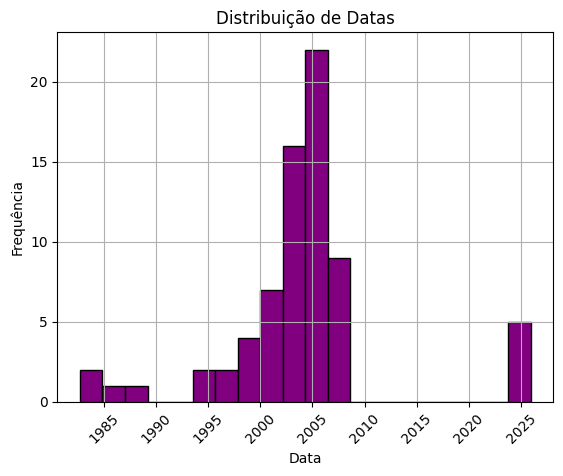

In [39]:
df['data'].hist(bins=20, color='purple', edgecolor='black')
plt.xlabel("Data")
plt.ylabel("Frequ√™ncia")
plt.title("Distribui√ß√£o de Datas")
plt.xticks(rotation=45)
plt.show()


### 7.3. Gr√°fico de Pizza para Distribui√ß√£o Mensal
Podemos visualizar a distribui√ß√£o dos registros ao longo dos meses em um gr√°fico de pizza.

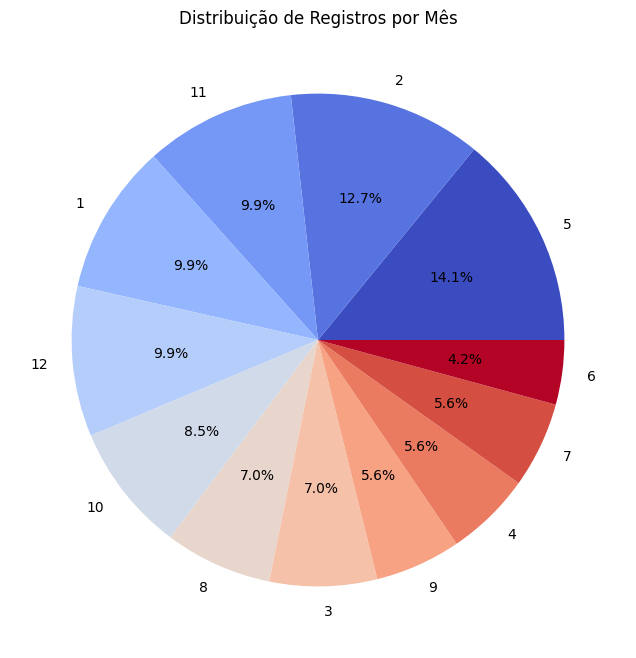

In [40]:
df['mes'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), colormap="coolwarm")
plt.title("Distribui√ß√£o de Registros por M√™s")
plt.ylabel("")
plt.show()


### 7.4. Boxplot para Identificar Outliers Temporais
O boxplot mostra poss√≠veis outliers nas datas.

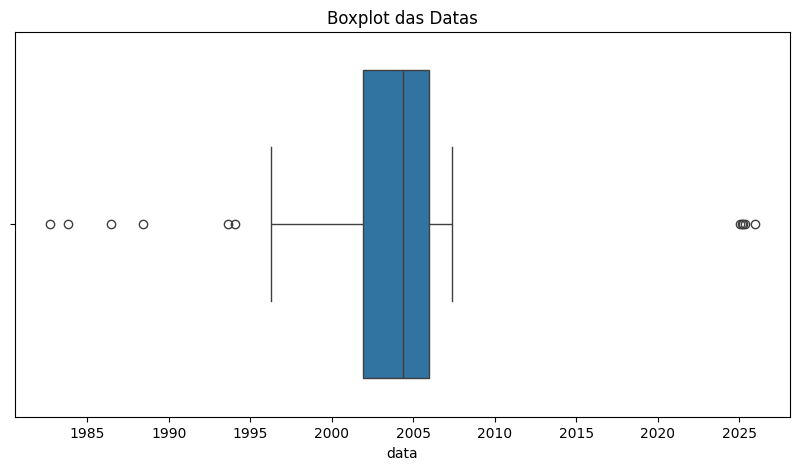

In [41]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=df['data'])
plt.title("Boxplot das Datas")
plt.show()
